# ドル円 為替レート 15分足

### 一つ上のディレクトリをパスに追加

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリをここで一括インポート

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.common import get_name_15min_chart, get_name_15min_chart_now

## yfinance による株価データの取得

In [3]:
code = "USDJPY=X"
symbol = code
ticker = yf.Ticker(symbol)
# 長めにデータを取得しておく
df = ticker.history(period='2d', interval='15m')
# タイムゾーンを日本時間に変換
df.index = df.index.tz_convert('Asia/Tokyo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-06 08:00:00+09:00,143.518005,143.582993,143.490005,143.524994,0,0.0,0.0
2025-06-06 08:15:00+09:00,143.526001,143.528000,143.453995,143.505997,0,0.0,0.0
2025-06-06 08:30:00+09:00,143.503998,143.546005,143.464005,143.529999,0,0.0,0.0
2025-06-06 08:45:00+09:00,143.529999,143.597000,143.503006,143.554001,0,0.0,0.0
2025-06-06 09:00:00+09:00,143.552002,143.643005,143.526001,143.608994,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-09 10:00:00+09:00,144.938004,144.938995,144.720001,144.738007,0,0.0,0.0
2025-06-09 10:15:00+09:00,144.738998,144.781998,144.563995,144.610992,0,0.0,0.0
2025-06-09 10:30:00+09:00,144.604004,144.684006,144.548004,144.567993,0,0.0,0.0


## 時間帯を固定

In [4]:
# 現在時刻から、本日の日付を使用する
dt = datetime.datetime.now()
# ザラ場の取引時間に固定する
dt_start = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 09:00:00+09:00")
dt_end = pd.to_datetime(f"{dt.year}-{dt.month}-{dt.day} 15:30:00+09:00")
df0 = df[(dt_start <= df.index) & (df.index <= dt_end)]
dt_first = df0.index[0]
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-06-09 09:00:00+09:00,144.690002,144.699997,144.574005,144.664001,0,0.0,0.0
2025-06-09 09:15:00+09:00,144.660004,144.824997,144.660004,144.800995,0,0.0,0.0
2025-06-09 09:30:00+09:00,144.798004,144.809006,144.638000,144.768997,0,0.0,0.0
2025-06-09 09:45:00+09:00,144.770996,144.947998,144.753998,144.932007,0,0.0,0.0
2025-06-09 10:00:00+09:00,144.938004,144.938995,144.720001,144.738007,0,0.0,0.0
2025-06-09 10:15:00+09:00,144.738998,144.781998,144.563995,144.610992,0,0.0,0.0
2025-06-09 10:30:00+09:00,144.604004,144.684006,144.548004,144.567993,0,0.0,0.0
2025-06-09 10:45:00+09:00,144.567993,144.572998,144.470001,144.542007,0,0.0,0.0
2025-06-09 11:00:00+09:00,144.541000,144.570999,144.391998,144.397003,0,0.0,0.0


## ローソク足チャート（小さいサイズ）

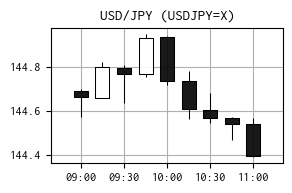

In [5]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 9

fig, ax = plt.subplots(figsize=(3, 2))
mpf.plot(
    df0,
    type='candle',
    style='default',
    datetime_format='%H:%M',
    xrotation=0,
    update_width_config=dict(candle_linewidth=0.75),
    ax=ax,
)
ax.set_ylabel(None)
ax.grid()

if "shortName" in ticker.info:
    ax.set_title(f"{ticker.info['shortName']} ({symbol})")
elif "longName" in ticker.info:
    ax.set_title(f"{ticker.info['longName']} ({symbol})")
else:
    ax.set_title(f"{symbol}")
    
plt.tight_layout()
plt.savefig(get_name_15min_chart(code, dt_first))
plt.show()